In [1]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem
from pymoo.algorithms.moo.nsga2 import NSGA2 
from pymoo.operators.crossover.sbx import SBX 
from pymoo.operators.mutation.pm import PM 
from pymoo.operators.sampling.rnd import FloatRandomSampling
from pymoo.termination import get_termination
from pymoo.optimize import minimize
import matplotlib.pyplot as plt
termination = get_termination('n_gen', 40)

In [2]:
class MyProblem(ElementwiseProblem):
    def __init__(self):
        super().__init__(
                n_var = 2,
                n_obj = 2,
                n_ieq_constr = 2,
                xl = np.array([-2, -2]),
                xu = np.array([2, 2])
            )
        
    def _evaluate(
            self,
            x, 
            out, 
            *args,
            **kwargs
        ):
        
        f1 = 100 * (x[0] ** 2 + x[1] ** 2)
        f2 = (x[0] - 1) ** 2 + x[1] ** 2
        
        g1 = 2 * (x[0] - 0.1) * (x[0] - 0.9) / 0.18
        g2 = -20 * (x[0] - 0.4) * (x[0] - 0.6) / 4.8
        
        out['F'] = [f1, f2]
        out['G'] = [g1, g2]

In [3]:
problem = MyProblem()
algorithm = NSGA2(
            pop_size = 40,
            n_offsprings = 10,
            sampling = FloatRandomSampling(),
            crossover = SBX(
                            prob = 0.9,
                            eta = 15
                        ),
            mutation = PM(eta = 20),
            eliminate_duplicates = True
        )

In [6]:
result = minimize(
            problem,
            algorithm,
            termination,
            seed = 1,
            save_history = True,
            verbose = False
        )

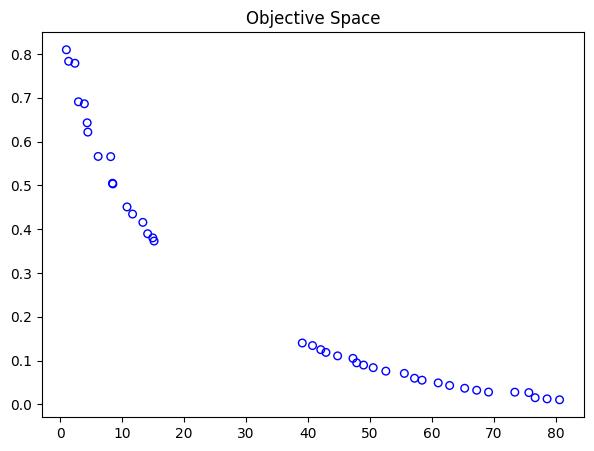

In [7]:
X = result.F
F = result.F
plt.figure(figsize = (7, 5))
plt.scatter(
        F[ :, 0], 
        F[ :, 1],     
        s = 30, 
        facecolor = 'none', 
        edgecolors = 'blue'
    )
plt.title('Objective Space')
plt.show()